# Week 5 - Your 1st ML Model: k-Nearest Neighbours Classification

<hr style="border:2px solid gray">
<a name="preliminaries"></a>

# Preliminaries: Recommended Books

There are three books recommended books:

1) [The One Hundred-Page Machine Learning Book](http://themlbook.com/) by 
Andriy Burkov. 
- This is a great conceptual book on ML, with a reasonable summary of the mathematics. A free sample of the book is available (up to about page 34). Copies are available in the college library.

2) [Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron. 
- A great hands-on book for ML to take you from no knowledge to implementing models, and has sufficient detail to take you into the understanding of the algorithms. This book also has a good collection of the original papers cited and links to them on their website. There is also much information on the [github](https://homl.info). An online version can be accessed through the college library, if you search it by name through the library website. 

3) [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/). This is a more introductory level than one above, however it is really well written and takes you through things more carefully.

There are plenty of other good and more theoretical ML books but the above are practical while having enough theory for you to understand them. In this course we only have time to teach you the basics and to touch on a few techniques. These books will take you further.

**Note:** Examples from the last two of these books will be used throughout these workbooks (on publically available data) and will be referenced appropriately. **2.** will be denoted as **{homl}** and **3.** as **{imlp}**. 

<hr style="border:2px solid gray">

# Outline <a id='outline'></a>
1. [Section One: Introduction to Machine Learning](#section-1)
1. [Section Two: k-Nearest Neighbours](#section-2)
1. [Section Three: Challenges in ML](#section-3)
1. [Section Four: The IRIS dataset](#section-4)
1. [Section Five: Exercises](#section-5)

<hr style="border:2px solid gray">
<a name="section-1"></a>

# Section One: Introduction to Machine Learning [^](#outline)

In machine learning you build a model from the data that you have. There are many different types of machine learning and there are many different ways of categorising them. We want our model to learn about the data we show it, and then make some kind of prediction on unseen data. The specifics of the training data and the predictions depend on the type of learning we are considering.

<!-- Need some general comments on terminology, train/test sets, etc -->

## Supervised, Unsupervised, Semisupervised, and Reinforcement Learning

**Supervised learning** builds a model using existing data with a **known desired output** (called labels) where we want to predict the outcome for new observations of the input. We say that this training data is **labelled**. Most of the machine learning that we carry out in the physical sciences (and the world at large) is supervised. The existing data is called **training data** and is used to train the model. Some examples of supervised learning include:
* **Regression**: predicting a continuous output value. 
    * Example: predicting the price of a car based on characteristics of the car
<br>
<br/>


* **Binary classification**: classifying data into one of two classes. 
    * Example: classifying emails as spam or not
<br>
<br/>

* **Multiclass classification**: classifying data into one of multiple classes. 
    * Example: facial recognition against a database of faces
    
We will talk more about classification and regression later in this notebook.


**Unsupervised learning** is where you don't have a known desired output, aka where the training data is **unlabelled**, so you are trying to build a model based on other properties. We find patterns based on similarities or differences of data points. Common examples include:
* **Clustering**: grouping data into categories without any prior information 
    * Example: social network friend suggestions

    


An example of a training dataset for supervised vs unsupervised learning can be seen in the figure below.

<img src=ML_Week5_Photos/Labelled_vs_unlabelled.png height=400 align="center"/>

*Example of labelled and unlabelled data for supervised and unsupervised learning respectively. In the supervised case, each class is already labelled. In the unsupervised case, the algorithm must learn the clusters from the unlabelled data.*



<div style="background-color: #FFF8C6">

**Semisupervised learning** sits somewhere between supervised and unsupervised learning, where you have algorithms that cope with partially labelled data. Often the labelled data points are used to infer labels for the unlabelled data points, and the combined labelled dataset is used to train a complete model for making predictions on new data.
* Examples include: face identification in a series of photos. A semi-supervised algorithm identifies the same person in multiple photos and can then label that person in every photo once a label is provided for one photo.

<img src=ML_Week5_Photos/semi_supervised_example.png align="center"/>

*Example of semi-supervised learning. The unlabelled grey points help classify a new point (the cross) into the triangle class, despite the proximity of the labeled squares. The labels for the unlabelled points are inferred first and used to help prediction on unseen data. (Source: ***{homl}***, Figure 1-11).*

**Reinforcement learning** has **agents** that can take different actions according to a policy. Actions are rewarded or penalised depending on the application, so the agent must learn the best policy of actions to take in a given situation, to maximise the reward and minimise the penalty. Inputs to the model are parameters of the situation, and the output is the choice of action by the agent.
    
* Examples include: teaching robots to walk, AI for chess 

<img src=ML_Week5_Photos/reinforcement_example.png align="center"/>

*Example of reinforcement learning. Rewards and penalties are associated with each action the agent can take, and the policy is updated depending on the specific reward or penalty received after action. (Source: ***{homl}***, Figure 1-12).*



For the rest of this course, we will restrict ourselves to just discussing supervised and unsupervised learning, with the main emphasis on supervised methods. However, an awareness of of semi-supervised and reinforcement techniques is useful for general understanding.

<div style="background-color:#FFCCCB">

## Mathematical formulation of supervised and unsupervised learning

## Supervised learning

For supervised learning, training data comes in pairs ($\mathbf{X}$, $y$), where $\mathbf{X} \in \mathbb{R}^d$ is the input vector and $y$ is the corresonding label. The total training dataset can therefore be denoted as 

D = {($\mathbf{X}_1$, $y_1$),$\dots$,($\mathbf{X}_n$, $y_n$)} $\subseteq \mathbb{R}^d \times \mathcal{C}$,
where:

* $\mathbb{R}^d$ is the $d$-dimensional feature space
* $\mathbf{X}_i$ is the input vector of the $i$-th sample
* $y_i$ is the label of the $i$-th sample
* $\mathcal{C}$ is the space of possible labels, referred to as the **label space**

$\mathbf{X}_i$ is referred to as a **feature vector** and denotes a single data point. Each of the $d$ dimensions of these vectors is a **feature** of that single data point. Features can include continuous numerical values, e.g. for a model to predict house prices this could include the floor area of the house, the last sale price, etc. Features can also be categorical, e.g. if it has a garden or not. In general features consist of all things that describe your data.

The label space $\mathcal{C}$ contains all possible labels. Some possible label spaces could include:
* Binary classification: $\mathcal{C}$ = {0, 1} or $\mathcal{C}$ = {-1, +1}. Two individual classes, that are represented numerically with two different values, e.g. classifying email as spam or not.
    <br>
    
* Multiclass classification: $\mathcal{C}$ = {1, 2, $\dots$, K}. K individual classes, which are each represented with an index, e.g. facial recognition against a database of faces
    <br>
    
* Regression: $\mathcal{C} = \mathbb{R}$. Label space is any real number, e.g. predicting house price.


The aim of the machine learning algorithm is to determine some function $f$ that can map $\mathbf{X}_i$ to $y_i$ for the training data, and make predictions on new unseen data. $f$ belongs to a space of possible functions $F$, referred to as the **hypothesis class**, which are determined by the specific algorithm you are using. Learning the specific function $f$ is the actual learning process of a machine learning algorithm. The perfomance of the choice of function is quantified by a **loss function** $L(\hat{y}_i ,y_i)$, where $\hat{y}_i = f(\mathbf{X}_i)$ is the **prediction** of the algorithm for the input $\mathbf{X}_i$. The function $f$ is optimised in order to minimise or maximise the loss function, depending on the specific algorithm and choice of loss function. The specific algorithm for optimisation depends on the specific application

## Unsupervised learning

In unsupervised learning, rather than learning a relationship between an input $\mathbf{X}_i$ and a target $y_i$, we attempt to learn patterns in the input data. This can be interpreted as attempting to observe a set of inputs {$\mathbf{X}_1, \dots, \mathbf{X}_N$} and inferring the probability distribution $p(\mathbf{X})$ of the input space $X$, or interesting properties of said distribution. Common applications include clustering for data exploration, and detection of anomalies that differ significantly from a dataset.

Many of the algorithms we will see can be extended to unsupervised learning by changing the loss function. 

## Classification and Regression

The two main uses of ML in Physics are classification and regression in supervised ML. 

In **classification** you are trying to **distinguish between discrete types of entities**. For example pictures of cats from dogs, spam emails,  clothes types, whether energy deposition in a detector is from an electron or a muon, etc. Classification problems are often binary $y\in \{0,1\}$, however there are generalisations to multiple-class cases. You'll have seen classification previously in Week 3.

<img src=ML_Week5_Photos/homl_classification2.png align="center"/>

*A classification problem: separating spam emails from non-spam emails. Examples of spam and non-spam emails are shown to the algorithm, which then classifies unseen examples  (Source: ***{homl}***, Figure 1-5).*

In **regression** you are trying to **predict a value from a continuous space**. For example the return on an investment, energy of a cosmic ray based on the observation of scintillation light and the muons that it produced etc. Simply, classification tells you what it is whereas regression tells you what value it has. We've briefly touched on regression last week, when we discussed fitting.

<img src=ML_Week5_Photos/homl_regression2.png align="center"/>

*Regression example, with a single input feature. Predictions of values for unseen inputs are made based on the previously seen training data (Source: ***{homl}***, Figure 1-6)*.

**Note:** While these sound conceptually quite different the same approaches can often be used for both as you will see throughout this course.

## Instance-based and Model-based Learning

The purpose of ML is to be able to take the data that you have and generalise it to new data. 

For **instance-based learning**, predictions for test data are calculated by comparing your test data with your training data and saying your test data targets should be the "same" as the "nearest" training data points. How we define both "same" and "nearest" depends on the specifics of the algorithm in question.
 * We assess how "close" a test point is to training data through some function of the data points, e.g. Euclidean distance between the test point inputs and the training point inputs.
 * What the "same" prediction means depends on our algorithm, e.g. for classification we could predict the same class, or for regression we could predict the mean of the closest points, but there are many different definitions.
 
Common examples of these algorithms are k-Nearest Neighbours (discussed below), kernel machines, and more.


<div>
<img src=ML_Week5_Photos/instance-based-example.png align="center" width=700/>
</div>


*Example of instance based learning: the value at a new data point is determined by the existing instances only. (Source: ***{homl}***, Figure 1-15).*


In **model-based learning** you take a few instances and build a more general **model**. This model is refined through training and validation. Model-based ML models often have internal **parameters** that are not seen in the outside world, which are optimised to solve the problem in question.

Examples of such an approach include decision trees and neural networks, both of which are covered later in this course.

<div>
<img src=ML_Week5_Photos/model-based-example.png align='center' width=500/>
</div>


*Example of model based learning: the value at a new data point is determined by a model, which has learned its parameters from existing instances.*

In model-based learning, the model we train has internal **parameters**, which are learned and determined during the training procedure; for example, the support vectors in a Support Vector Machine or the weights of a neural network (both of which you will see later in this course). In contrast, all algorithms have **hyperparameters**, which are parameters of the algorithm itself that determine the training. Examples include $k$ in k-Nearest Neighbours (shown below), the depth of trees in a decision tree, or the number of hidden layers in a neural network (both of which are seen later in this course). It is important to understand the difference between these two concepts:

* **Parameters**: internal values of a model that are learned from training data. These are optimised during training to learn how to predict the training data.
* **Hyperparameters**: values that are passed to an algorithm and determine how the training is done. These are set by the user at the start of training, and may be optimised for subsequent models to find the best performing model.



## Summary

This section has introduced some of the key fundamentals of machine learning, including:
 * Supervised vs unsupervised learning
 * Classification and regression
 * Instance-based and model-based learning

The remainder of this workbook is concerned with classification. The next section will describe one of the algorithms we are going to use.

<hr style="border:2px solid gray">
<a id='section-2'></a>

# Section Two: k-Nearest Neighbours [^](#outline)

k-Nearest Neighbours (k-NN) is one of the most commonly used ML algorithms, and is an example of an instance-based algorithm. 
The k-NN algorithm can be used for both classification and regression. It starts with calculating a so-called **distance metric** of a new point $\mathbf{X}$ to all other points in the dataset. It then finds the $k$ points nearest to $\mathbf{X}$. How we make a prediction depends on the problem we are tackling i.e. whether we are doing classification or regression.

* **Classification**: labels refer to categories. The new data point $x$ is assigned to the most frequent class of its $k$-nearest neighbours. For example, if our goal is to classify cats or dogs and the three nearest data-points ($k=3$) to $\mathbf{X}$ are classified as cat, cat, dog, then our new point $\mathbf{X}$ would be classified as cat. However, if look at the 10 nearest data points ($k=10$) to $\mathbf{X}$ and we find now that 4 are cat and 6 are dog, $\mathbf{X}$ would be classified as dog.

<div>
<img src=ML_Week5_Photos/k-nn_classification_example-final.png width=450 align="center"/>
</div>

*Example of classification using k-NN: in the first circle $k=3$, the most common class in the nearest neighbours to the black object is the square class, so the black object is classified as a square. In the second circle $k=7$, the most common class is the triangle and so the black object is is classified as a triangle.*


* **Regression**: labels are continuous variables. The label of the new data point $\mathbf{X}$ is chosen to be the mean of the labels of its $k$-nearest neighbours. An example can be seen in the figure below.


<img src=ML_Week5_Photos/k-nn_regression_example.png height=400 align="center">

*Example of regression using k-NN: the data are generated according to $y = \mathbf{X}^2$ plus Gaussian noise. For $k$ = 5, the prediction is close to the trend we would expect. However, for $k$ = 12, the prediction point is overestimated compared to $k$ = 5, as higher values are captured in the $k$-nearest neighbours.*

The choice of **distance metric** is one of the most important hyperparameter choices for k-NN, as it defines what which points are the nearest neighbours of a prediction point.

A commonly used distance metric is the (classic) Euclidean distance
\begin{equation*}
d(\mathbf{p},\mathbf{q})=\sqrt{\sum_{i=1}^{D}\left(q_{i}-p_{i}\right)^{2}},
\end{equation*}
where $\mathbf{p}$ and $\mathbf{q}$ are two points in our $D$-dimensional Euclidean space. Other distances can be chosen depending on the problem at hand. 

A helpful resource for the different types of distances and situations where they are used can be found [here](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.).

You can also choose how points are weighted; common choices are either uniform, so every point is considered equal, or distance, which weights the contribution of a given training point inversely to the distance from the prediction point i.e. closer training points contribute more. It is also possible to define your own weighting scheme, see the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

## Toy example

Now that we have established the mathematics of k-Nearest Neighbours, you will have an opportunity to try it for classification. For k-NN, we will use the scikit-learn package, which is imported in Python as `sklearn`. Scikit-learn has a nice function to generate toy data for testing classification algorithms, called ```make_blobs```:

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

# Note: it is convention to label X as capital and y as lowercase
X, y = make_blobs(300,2, center_box=(-5,5), centers = 2, random_state = 2) 

X and y contain the samples and the corresponding class labels respectively. 


<!-- <div style="background-color:#C2F5DD"> -->
 
* How many features does this dataset have? 
* How many classes? 

(Hint: check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html))

Now that we have a dataset, the first thing to do is visualise it. This can be done in a number of ways, but an easy way to do it is to put your data into a Pandas dataframe and plot the **scatter matrix**.

array([[<Axes: xlabel='Feature 1', ylabel='Feature 1'>,
        <Axes: xlabel='Feature 2', ylabel='Feature 1'>],
       [<Axes: xlabel='Feature 1', ylabel='Feature 2'>,
        <Axes: xlabel='Feature 2', ylabel='Feature 2'>]], dtype=object)

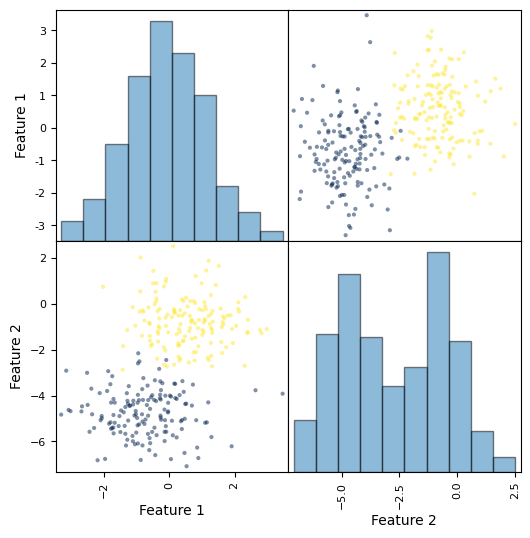

In [2]:
import matplotlib.cm as cm

df_toy = pd.DataFrame(X,columns=['Feature 1','Feature 2'])
pd.plotting.scatter_matrix(df_toy, figsize = (6,6), c = y, hist_kwds={'edgecolor':'black','alpha':0.5}, cmap = cm.cividis)

This plot can look a little confusing at first, but it is actually quite simple. The top-right and bottom-left plots show scatter plots of one feature vs another, while the top-left and bottom-right plots are histograms of each feature in turn. For a simple dataset like we have here there is only 1 unique scatter plot, but in general we will work with multi-dimensional datasets that have more complex relationships (as you will see later in this workbook).

You might be able to see by eye how you could separate different classes in your data from these plots. In order to do this, we are going to use a k-NN classifier. 

When we train a model, we need to separate our data into a training set and a testing set. This is to make sure we have an independent metric for our model performance; while performance on training data is important (we make sure the model has learned the training data), we also need to make sure our model performs well on unseen data.

* **Training data**: data the algorithm sees during training

* **Testing data**: data the algorithm does not see during training

Splitting our data into training and test sets can be done easily using an `sklearn` function, ```train_test_split```:

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Take 20% of the data out for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 3) 



Now we need to train the model on our training data:

In [4]:
# These are hyperparameters of the k-NN algorithm
neighbours = 5
weights = 'uniform'
# weights = 'distance'

knn_toy = KNeighborsClassifier(neighbours, weights = weights)
knn_toy.fit(X_train,y_train)

KNeighborsClassifier()

We have now trained the algorithm. For k-NN, this is as simple as saving the training points to the model object, as it is an instance-based learning method, but later on we will encounter algorithms that have a more involved training process.

From here, the next step is to try predicting our test data. We know what the true class of each sample should be, so we can identify if the k-NN prediction is right or wrong. We calculate the **classification accuracy**, which is the ratio of correct predictions to the total number of predictions, so the proportion of test points predicted correctly. This is therefore defined as

\begin{equation*}
    \text{Accuracy} = \frac{N_{\text{correct}}}{N_{\text{total}}},
\end{equation*}
where $N_{\text{correct}}$ denotes the number of correctly predicted test points and $N_{\text{total}}$ denotes the total number of test points.

Now we can calculate it for our toy model:

In [5]:
y_pred = knn_toy.predict(X_test)

correct, total = 0, 0
for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
        correct += 1
    total+=1

print(f"Classification accuracy = {correct/total}")


Classification accuracy = 0.9833333333333333


We've done this by hand here, but sklearn also has a function that will do this for us:

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9833333333333333

<div style="background-color:#C2F5DD">


### Example

Now you have the steps to build, train and test a k-NN classifier, try varying the hyperparameters and try to find the best results you can. Hyperparameters to try varying include:
* The value of $k$
* The weight scheme

There are others, take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to see what else you can vary. Make sure to record whatever you do vary!

Record your results in a Pandas DataFrame, with a column for each hyperparameter you vary and one for your test classification accuracy.
    
Which hyperparameters performed the best? Answer in the Markdown cell below.

First we will present an example of how to train a model in the suggested structure, then write a loop over some hyperparameter values to quickly test other values.

In [7]:
# Define your hyperparameters

weights = 'uniform'
neighbors = 10

In [8]:
# Define your model

model = KNeighborsClassifier(n_neighbors = neighbors, weights = weights)

In [9]:
# Fit your model

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [10]:
# Predict on test data and calculate classification accuracy

y_pred = model.predict(X_test)

acc = accuracy_score(y_test,y_pred)

print('Classification accuracy: {:.1f}%'.format(acc*100))

Classification accuracy: 96.7%


In [11]:
# Add results to pandas DataFrame
# Hint: put the new data into a dictionary, then use DataFrame.append (check the documentation 
# if you are unsure)
import pandas as pd

df = pd.DataFrame(columns=['n_neighbors','weights','test_accuracy'])

df = pd.concat([df, pd.DataFrame([{'n_neighbors':neighbors,'weights':weights,'test_accuracy':acc}])])

/var/folders/6n/99b3td957mv12ycyglnql6_w0000gp/T/ipykernel_95678/3764777714.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{'n_neighbors':neighbors,'weights':weights,'test_accuracy':acc}])])


In [12]:
# Print final pandas DataFrame

display(df)

,n_neighbors,weights,test_accuracy
0,10,uniform,0.966667


Now we will loop over some possible hyperparameter values.

In [13]:
df = pd.DataFrame(columns=['n_neighbors','weights','test_accuracy'])

list_of_weights = ['uniform','distance']
list_of_neighbors = [3, 8, 15, 25, 40]

# Use a list comprehension to make a list with each possible combination of these values
for weights, neighbors in [(w, n) for w in list_of_weights for n in list_of_neighbors]:
    model = KNeighborsClassifier(n_neighbors = neighbors, weights = weights)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    df = pd.concat([df, pd.DataFrame([{'n_neighbors':neighbors,'weights':weights,'test_accuracy':acc}])])

/var/folders/6n/99b3td957mv12ycyglnql6_w0000gp/T/ipykernel_95678/2233111147.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{'n_neighbors':neighbors,'weights':weights,'test_accuracy':acc}])])


In [14]:
display(df)

,n_neighbors,weights,test_accuracy
0,3,uniform,0.983333
0,8,uniform,0.966667
0,15,uniform,0.966667
0,25,uniform,0.966667
0,40,uniform,0.966667
0,3,distance,0.983333
0,8,distance,0.983333
0,15,distance,0.983333
0,25,distance,0.983333
0,40,distance,0.983333


In general, using `weights = 'distance'` performs better than using uniform weights, which is because we therefore care more about the closer training points than those further away. However, we have very simple data, so the total difference between different hyperparameters is very small. This will be more relevant for more complex data.

<div style="background-color:#C2F5DD">

End of Example

## Summary

This section has introduced the k-Nearest Neighbours algorithm, including:
 * Classification & regression examples
 * A toy model for classification
 * The general steps for preparing data, training a model, and testing on test data

The following section describes some of the difficulties we can encounter with machine learning, and how we can handle some of them.

<hr style="border:2px solid gray">
<a id='section-3'></a>

# Section Three: Challenges in ML [^](#outline)



So far, applying ML has seemed pretty simple. However, there are many possible pitfalls with these approaches that you need to be aware of. In fact, there have been several high-profile incidences of machine learning algorithms going wrong. These include:

* Amazon's development of an AI tool to help shortlist job applicants, which was trained on the previous 10 years of resumes submitted to Amazon. Because these resumes were predominantly from male candidates, the algorithm "learned" that male candidates were more likely to be successful and therefore penalised resumes that had terms identifying it as a female applicant. Attempts were made to reduce the bias but ultimately were unsuccessful and the [project was scrapped](https://www.bbc.co.uk/news/technology-45809919).
* Microsoft's AI chatbot Tay, which was released on Twitter and learned from interacting with people on the platform. [Within 16 hours the project was taken down](https://en.wikipedia.org/wiki/Tay_(chatbot)) as the AI started posting racist and sexist tweets, due to learning from users spamming it with politically incorrect phrases and disciminatory language. 

Because the model just learns from your data, if you are not careful with what is in your training data you can easily produce results that are a) unexpected, and b) undesirable. This is one of the many reasons why it is important to visualise and understand your training dataset.

A few possible challenges include:

* **Insufficient training data**: to build an accurate, generalisable model, you typically need **a lot** of training data; insufficient data means your model can't accurately learn the function $f$ and so cannot make accurate predictions
<br>

* **Biased training data**: perhaps more dangerous than insufficient training data, as biased training data can mean your model does very well in some cases, but very poorly in others. This can be e.g. an imbalanced training dataset, where you show more examples of one class than the others like the Amazon example above, or systematic issues with measurement e.g. poor thermal contact, zero error, background noise etc.
<br>

* **Poor quality training data**: if your data is noisy, or has a lot of outliers, your model cannot accurately learn the function mapping inputs to targets. For data with values missing for some features (e.g. if you have issues with measurement equipment) you can mitigate to some extent by either taking a median value or setting it to far outside of a reasonable range so the model learns not to use it.
<br>

* **Overfitting**: overfitting describes the situation where a model learns how to predict the training data and **only** the training data. The model is sufficiently complex that it can perfectly fit the training data, e.g. fitting a high order polynomial to data that is perhaps better modelled as a linear relationship with some noise. This results in poor prediction for unseen data, but can be mitigated at training time by including **regularisation**.
<br>

* **Underfitting**: the opposite of overfitting, this occurs when your model is not sufficiently complex to capture the features of the data. As a result, it is not capable of learning the function behind the data. An example would be trying to fit a quadratic dataset with a linear model.

<div>
<img src=ML_Week5_Photos/under_vs_over_fitting.png width=700 align='center'/>
<div/>

*Example of under and over fitting on quadratic data using traditional fitting, like we discussed in Week 4 . The generated data is quadratic with Gaussian noise. The linear model clearly underfits and does not accurately approximate the data, whereas the high-order polynomial (order 300) overfits, resulting in predictions that will not generalise despite good performance on the existing data.*


The only way to know if your model has generalised well is to **validate it on data**. As mentioned before, the normal way to do this is to separate your data into **training data** and **testing data**. You use the **training data** to train your model and the **testing data** to test how well it has generalised. If there is a large difference in the performance of the model on the training data compared to the performance on the testing data it shows that your model has been **overtrained** and is learning features that are specific to your training data. 

**Note:** *What fraction of your data should you use to train and what fraction to test?* There is no single answer to this question, but in most cases the training:testing ratio is around 80:20 or 70:30.



## Cross-Validation

Of course, because we can vary hyperparameters or even the specific algorithm we choose to use for the problem, this isn't all we need to consider. Historically, it was common to iterate on an ML algorithm, varying hyperparameters, until the performance on the **test data** was deemed sufficiently good. Of course, if this is done, you are implicitly learning the test data to some degree, just through your hyperparameter optimisation rather than during the training procedure. 

To get around this, the idea of cross validation came around. This is where you break down the training set into a number of smaller sets called **folds**. You then train your model with all but one of these folds and evaluate with remaining fold. This way you get an array of evaluations to validate individual attempts at training a model. Your test data can (and should) be kept to one side for final evaluation after you have finished optimising your model training. 

<div style="background-color:#FFCCCB">

### $T$-fold Cross-Validation

This is when we **split our data** into **training-validation** sets $T$-times (sometimes can be called $k$-fold Cross-Validation, but we have used a $T$ to avoid confusion with k-NN) to reduce the risk of **overfitting** to the full training data or to parts of the training data.

Mathematically, the procedure is as follows. We split the data $\mathcal{S}=\{\mathbf{X}^{(i)}, y^{(i)}\}$ for $i=1,...,N$ equally sized subsets $\mathcal{S_{t}}$ such that
\begin{equation*}
\mathcal{S}=\bigcup_{t=1}^{T}\mathcal{S}_{t} \; \text{and} \; |\mathcal{S}_{t}|=\frac{|\mathcal{S}|}{T},
\end{equation*}
where $|\mathcal{S_{m}}|$ is the size of the $mth$ subset. We set aside one of the subsets and train the model on the rest of the samples i.e. $\overline{\mathcal{S_{t}}}=\mathcal{S}-\mathcal{S_{t}}$. We learn a model $\hat{f}_{\overline{\mathcal{S_{t}}}}$, which we use to predict $\mathcal{S_{t}}$. We then compute an error measure for the prediction on $\mathcal{S_{t}}$ (for example the classification accuracy):
\begin{equation*}
\text{Accuracy}_t = \frac{N_{\text{correct}}^t}{N_{\text{total}}^t}, 
\end{equation*}
where $\text{Accuracy}_t$ denotes the accuracy of the model trained on subset $\overline{\mathcal{S}_{t}}$, and $N_{\text{correct}}^t$ and $N_{\text{total}}^t$ denote the total number of correct predictions and total number of predictions made on the subset $\mathcal{S}_t$ respectively.

The same process is done in turn for each of the subsets of our split $\mathcal{S}_{t}$, $t=1,..,T$ in each case obtaining a different model for their corresponding complement. 

We then compute the average classification accuracy over all $T$-folds:
\begin{equation*}
\langle\text{Accuracy}\rangle=\frac{1}{T}\sum_{t=1}^{T}\text{Accuracy}_t.
\end{equation*}

This average classification accuracy is then a measure of how well the model predicts *out-of-sample* i.e. on data that is not in its training set in a given fold.

**Choosing number of folds $T$:** It seems clear that the way in which we split the data into training and validation, and the balance between both sets, will effect the results of the cross-validation. The extreme case is $T=N$, which is called **leave-one-out** cross-validation (LOO-CV). This tests how well each sample can be predicted from the rest of the samples. However this is computationally expensive and **not necessary**.

In practice, the number of folds $T$ is chosen based on the size of the data and the amount of computing power available; larger $T$ means more models need to be fit. Typically $T=5$ is used for a smaller dataset and $T=10$ for larger ones, so that one does out-of-sample prediction on validation sets that contain around $10%$ od the data

More information can be found [here](https://machinelearningmastery.com/k-fold-cross-validation/).

It is easy to do cross-validation with `sklearn`, using the ```cross_val_score``` function. Each ML algorithm in `sklearn` has an default **scorer**, which in the case of classification algorithms is the classification accuracy. You will see more details about ML performance metrics next week, but for now we will use cross validation with our toy k-NN model to see how it works:

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_toy, X_train, y_train)

array([0.97916667, 1.        , 0.97916667, 0.95833333, 0.97916667])

You will apply this to your toy k-NN again in Exercise Two.

## A brief introduction to the Support Vector Machine

Of course, as mentioned before, the ```cross_val_score``` syntax is the same for each type of ML algorithm implemented in sklearn; to illustrate this, we are going to introduce (very briefly) another algorithm: the Support Vector Machine (SVM). There is an additional notebook available containing the full details of SVM, but it is not examinable for this course. In fact, the syntax of setting up and training a SVM classifier is actually pretty much identical to what you have seen already with k-NN, albeit with different hyperparameters:

In [16]:
from sklearn.svm import SVC

C = 1
kernel = 'linear'

svc_toy = SVC(C = C, kernel = kernel)

svc_toy.fit(X_train, y_train)

SVC(C=1, kernel='linear')

For SVC, the prediction syntax is the same as for k-NN. You will try using this model on your toy data in Exercise Three. 

The hyperparameters that we can vary for SVC are the value of `C`, which affects how strongly we penalise misclassifications, and the choice of `kernel`, which implicitly affects the dimensionality of our algorithm. See the supplementary notebook for more details.

## Summary

This section has outlined some of the possible issues with machine learning, as well as how they might be tackled, including:

* issues with dataset bias, insufficient training data, over and under fitting
* T-fold Cross Validation

Additionally, the support vector machine has been (briefly) introduced for classification, to compare with the k-NN shown previously. The following section will describe the dataset you will be working with for the remainder of this week.

<hr style="border:2px solid gray">
<a name='section-4'></a>

# Section Four: The Iris dataset [^](#outline)



For the remainder of this workbook, we will be using one of the most famous datasets in machine learning. First published outside of the context of ML in 1936, this dataset describes three different types of iris flowers (*versicolor*, *setosa* and *virginica*) based on four different metrics: petal length, petal width, sepal length and sepal width. A photograph illustrating these features can be seen in the figure below.

<img src=ML_Week5_Photos/iris-machinelearning.png align='center'>

*Different kinds of iris used in the Iris dataset, with the petal and sepal labelled on the iris versicolor ([source](https://www.datacamp.com/tutorial/machine-learning-in-r)).*

Further details about this dataset can be found online, e.g. on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) and in the [original paper](https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x). This dataset is commonly used for testing new classification algorithms and is just generally widely applied, although the dataset itself is quite small. It is sufficiently popular that it is built into a lot of different machine learning codebases, including scikit-learn. It is easy to import:

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

The loaded Iris dataset is contained within a dictionary. We can list the keys of the dictionary to see what is contained within the data:

In [18]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The ```scatter_matrix``` for this dataset is as follows:

<div>
<img src=ML_Week5_Photos/iris_scatter_matrix_legend.png align="center" width=600>
<div/>
    
Note that the legend has been added manually. 

Exercise Five covers visualising and investigating the IRIS dataset, while you will use it with k-NN and SVC in the exercises following that section.

## Summary

In this section you have been briefly introduced to the IRIS dataset. 

You will use this dataset, your toy dataset, and the two classification algorithms we have introduced so far for the remainder of this week.

The following section covers the exercises for you to work on yourselves this week.


<hr style="border:2px solid gray">

<a name="section-5"></a>

# Section Five: Exercises [^](#outline)

These exercises are here for you to get more experience using the algorithms presented earlier in this notebook. In each section, code cells have been given to help prompt you on each step to work through, but feel free to make your own steps if you want - just make sure you work through each of the tasks.

<div style="background-color:#C2F5DD">

### Exercise 1

Calculate the ```cross_val_score``` for different combinations of hyperparameters you investigated for the toy data in the earlier Example. Add the mean cross validation score to your pandas DataFrame as a new column.

Does cross-validation score correlate with test data classification accuracy? Why/why not? Answer in the Markdown cell below.

Again we will use a simple loop to quickly perform the cross validation for the hyperparameter scores we tested earlier.

In [19]:
cv_scores = []

for weights, neighbors in [(w, n) for w in list_of_weights for n in list_of_neighbors]:
    model = KNeighborsClassifier(n_neighbors = neighbors, weights = weights)
    cv_score = cross_val_score(model, X_train, y_train)
    cv_scores.append(cv_score.mean())
    
df['mean_cv_score'] = cv_scores
    

In [20]:
display(df)

,n_neighbors,weights,test_accuracy,mean_cv_score
0,3,uniform,0.983333,0.979167
0,8,uniform,0.966667,0.983333
0,15,uniform,0.966667,0.979167
0,25,uniform,0.966667,0.979167
0,40,uniform,0.966667,0.983333
0,3,distance,0.983333,0.983333
0,8,distance,0.983333,0.983333
0,15,distance,0.983333,0.979167
0,25,distance,0.983333,0.979167
0,40,distance,0.983333,0.979167


Similar to the previous exercise, due to the simplicity of the data all models have > 95% average cross validation accuracy. Increasing the number of neighbors considered seems to have a greater effect on the mean cross validation score as the cross validation accuracy decreases for higher `n_neighbors` in the case of distance weighting. If a model has a good mean CV score, it has a good test data score.

<div style="background-color:#C2F5DD">

### Exercise 2

Write some code in the following cell to predict the values for `X_test` and calculate the classification accuracy for the toy SVC model defined near the end of Section 3.



In [21]:
# Calculate model prediction

y_pred = svc_toy.predict(X_test)

In [22]:
# Calculate classification accuracy

acc = accuracy_score(y_test, y_pred)

print('SVC test classification accuracy: {:.1f}%'.format(acc*100))


SVC test classification accuracy: 96.7%


<div style="background-color:#C2F5DD">

### Exercise 3

We will now try varying the hyperparameters for the SVC model for our toy data. 
    
* Use the `help` function to look up the hyperparameters for support vector classification *(hint: stick to varying `C` and `kernel`)*
* Try varying the hyperparameters and checking your results using both cross validation and test classification accuracy

    
Record your results in a pandas DataFrame, including columns for each hyperparameter you vary and for the cross validation and test classification accuracies. Display the DataFrame at the end to get a table view of your results.
    
How do your SVC results compare to your k-NN results? Does one seem to perform better on test data than the other? What about cross-validation performance? Write your answers in the Markdown cell below.

Like before, we will use a loop over some values of hyperparameters to generate a DataFrame of results.

In [23]:
list_of_C = [1.0, 10.0, 100.0]
list_of_kernels = ['linear','poly','rbf','sigmoid']

list_of_hyperparameters = [(C, k) for C in list_of_C for k in list_of_kernels]


SVC_df = pd.DataFrame(columns=['C','kernel','test_accuracy','mean_cv_score'])
for C, kernel in list_of_hyperparameters:
    model = SVC(C = C, kernel = kernel)
    cv = cross_val_score(model, X_train, y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_dict = {'C':C, 'kernel':kernel,'test_accuracy':acc,'mean_cv_score':cv.mean()}
    SVC_df = pd.concat([SVC_df, pd.DataFrame([model_dict])])

/var/folders/6n/99b3td957mv12ycyglnql6_w0000gp/T/ipykernel_95678/2824731597.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  SVC_df = pd.concat([SVC_df, pd.DataFrame([model_dict])])


In [24]:
display(SVC_df)

,C,kernel,test_accuracy,mean_cv_score
0,1.0,linear,0.966667,0.983333
0,1.0,poly,0.966667,0.983333
0,1.0,rbf,0.966667,0.983333
0,1.0,sigmoid,0.666667,0.679167
0,10.0,linear,0.966667,0.983333
0,10.0,poly,0.966667,0.983333
0,10.0,rbf,0.966667,0.983333
0,10.0,sigmoid,0.616667,0.650000
0,100.0,linear,0.966667,0.983333
0,100.0,poly,0.966667,0.983333


Sigmoid kernel does a lot worse (to understand why, see the bonus SVM notebook), but otherwise test accuracy is the similar for most hyperparameter values. Mean CV score is slightly worse for rbf kernel for large C but otherwise performance is very similar (apart from sigmoid kernel). 

There's not a major difference between SVC and kNN test performance/cross validation performance for this dataset, because it is mostly linearly separable. We'll see more complex datasets later in this notebook and in later weeks.

## Iris Dataset

<div style="background-color:#C2F5DD">

### Exercise 4

* Use the ```print``` function to print the description of the Iris dataset. *Hint: have another look at the dictionary keys of the dataset*.
* Visualise the Iris dataset using pandas ```scatter_matrix```. Remember that the data must be put into a DataFrame to use this function.


In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [26]:
# Construct a DataFrame of the Iris input data

df = pd.DataFrame(iris.data, columns = iris.feature_names)

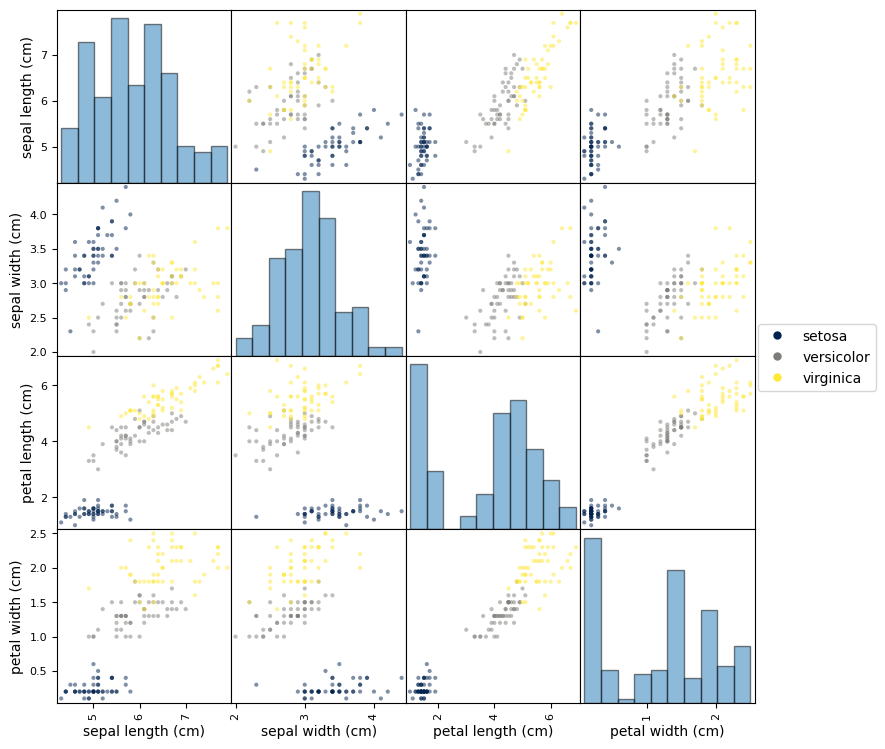

In [27]:
# Plot the scatter matrix

pd.plotting.scatter_matrix(df, c = iris.target,hist_kwds={'alpha':0.5,'edgecolor':'black'},figsize=(9,9), cmap = cm.cividis)

# Can manually add a legend:
import matplotlib.pyplot as plt

handles = [plt.plot([],[],c = cm.cividis(i/2),ls="", marker=".",markersize = 10)[0] for i in range(3)]
labels = iris.target_names

plt.legend(handles, labels, loc=(1.02,1.8))


<div style="background-color:#C2F5DD">


* From these plots, what can you say about the three classes here? 
* Are there any immediately obvious ways to separate any class?

Write a short answer in the Markdown cell below.


*Setosa* can be separated linearly from *versicolor* and *virginica* in pretty much any pair of variables, whereas it is much less obvious immediately how to separate *versicolor* and *virginica*.

<div style="background-color:#C2F5DD">
Once you are happy with the dataset, we will move on to applying some ML techniques to try to classify these irises.

## k-NN classification

<div style="background-color:#C2F5DD">

### Exercise 5

Much like we did for the toy model, we are going to try applying k-NN to the Iris dataset. 

* First, prepare the dataset for the k-NN - remember to split into train & test datasets
* Define the k-NN, including hyperparameters. Start with using uniform weights and k = 5.
* Train the k-NN
* Predict the test data and calculate the classification accuracy
* Calculate the cross-validation score

In [28]:
# Prepare the dataset
X = iris.data
y = iris.target

# Split into train & test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 3) 



In [29]:
# Define the k-NN
weights = 'uniform'
neighbors = 5

knn_iris = KNeighborsClassifier(n_neighbors = neighbors, weights = weights)

In [30]:
# Calculate cross-validation score

cv_score = cross_val_score(knn_iris, X_train, y_train)


In [31]:
# Train the k-NN

knn_iris.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# Predict test data
y_pred = knn_iris.predict(X_test)

# Calculate classification accuracy
acc = accuracy_score(y_test,y_pred)


In [33]:
print('Test classification accuracy = {:.1f}%'.format(acc*100))

Test classification accuracy = 96.7%


In [34]:
2

[0.91666667 0.95833333 1.         1.         0.95833333]


<div style="background-color:#C2F5DD">

### Exercise 6

Now that you have tried using a k-NN for the Iris dataset, try varying the hyperparameters to see how good a performance you can get. 

* Make sure to record your results & the corresponding hyperparameters in a pandas DataFrame as we have done previously.
* Remember you can use the ```help``` function to see what arguments to ```KNeighborsClassifier``` do
* Remember to use cross-validation each time
* You have calculated the overall accuracy so far. Try calculating the accuracy for each class of iris. *(Hint: you will need to separate your test data into each individual class)*

    
Are there any particular classes that your model seems to perform well/poorly on? Where might it get "confused" between different classes? Write your answer in the Markdown cell below.


Once again, we will use a loop to quickly evaluate for different hyperparameters. Your results will vary based on what hyperparameters you have tried.

To evaluate classification accuracy on each class individually, we need to separate the test data points into each class. We can do this by indexing based on the values of the target, which are 0, 1, and 2 (corresponding to *setosa*, *versicolor* and *virginica* respectively).

In [35]:
list_of_weights = ['uniform','distance']
list_of_neighbors = [3, 8, 15, 25, 40]

list_of_hyperparameters = [(n, w) for n in list_of_neighbors for w in list_of_weights]

knn_df = pd.DataFrame(columns=['n_neighbors','weights','test_accuracy','mean_cv_score',
                               'setosa_test_acc','versicolor_test_acc','virginica_test_acc'])

for neighbors, weights in list_of_hyperparameters:
    knn_model = KNeighborsClassifier(n_neighbors = neighbors, weights = weights)
    cv_score = cross_val_score(knn_model, X_train, y_train)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    setosa_acc = accuracy_score(y_test[y_test==0],y_pred[y_test==0])
    versicolor_acc = accuracy_score(y_test[y_test==1],y_pred[y_test==1])
    virginica_acc = accuracy_score(y_test[y_test==2],y_pred[y_test==2])
    model_dict = {'n_neighbors':neighbors,
                  'weights':weights,
                  'test_accuracy':acc,
                  'mean_cv_score':cv_score.mean(),
                  'setosa_test_acc':setosa_acc,
                  'versicolor_test_acc':versicolor_acc,
                  'virginica_test_acc':virginica_acc}
    knn_df = pd.concat([knn_df,pd.DataFrame([model_dict])])
        
    

/var/folders/6n/99b3td957mv12ycyglnql6_w0000gp/T/ipykernel_95678/2508613802.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  knn_df = pd.concat([knn_df,pd.DataFrame([model_dict])])


In [36]:
knn_df

,n_neighbors,weights,test_accuracy,mean_cv_score,setosa_test_acc,versicolor_test_acc,virginica_test_acc
0,3,uniform,0.966667,0.958333,1.0,0.9,1.0
0,3,distance,0.966667,0.958333,1.0,0.9,1.0
0,8,uniform,1.000000,0.950000,1.0,1.0,1.0
0,8,distance,0.966667,0.950000,1.0,0.9,1.0
0,15,uniform,1.000000,0.958333,1.0,1.0,1.0
0,15,distance,1.000000,0.966667,1.0,1.0,1.0
0,25,uniform,0.966667,0.941667,1.0,1.0,0.9
0,25,distance,1.000000,0.958333,1.0,1.0,1.0
0,40,uniform,0.966667,0.900000,1.0,1.0,0.9
0,40,distance,1.000000,0.933333,1.0,1.0,1.0


In all cases, the classification accuracy on *setosa* is 100%, because this class is linearly separable from the other classes. 

In general distance weighting again performs better than uniform weighting, and e.g. 15 neighbours seems a good number as this gives the best test accuracy, mean_cv_score, and specific class classification accuracy. Because *versicolor* and *virginica* are not linearly separable, a model is more likely to confuse the two. 

## Support Vector Classification (SVC)

<div style="background-color:#C2F5DD">

### Exercise 7

Now we are going to do the same analysis, using SVC. As mentioned before, you can read more detail about this algorithm in the supplementary notebook, but even without doing so you can still apply the same syntax as for the k-NN. As before:

* Prepare the dataset - keep the same train/test split (it is determined randomly, can you do anything about this?) to compare with k-NN
* Define the SVC, including hyperparameters. Use the same hyperparameters as the SVC we defined for the toy data.
* Train the SVC
* Predict the test data and calculate the classification accuracy
* Calculate the cross-validation score

In [37]:
# Define the SVC (including hyperparameters)

C = 1
kernel = 'linear'

svc_iris = SVC(C = C, kernel = kernel)

In [38]:
# Calculate cross validation score

svc_iris_cv_score = cross_val_score(svc_iris, X_train, y_train)

In [39]:
# Train the SVC

svc_iris.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [40]:
# Predict test data

svc_iris_pred = svc_iris.predict(X_test)

# Calculate classification accuracy

svc_iris_acc = accuracy_score(y_test, svc_iris_pred)

In [41]:
print("Test classification accuracy = {:.1f}".format(svc_iris_acc*100))

print("Cross validation scores: {}".format(svc_iris_cv_score))

Test classification accuracy = 96.7
Cross validation scores: [0.95833333 0.95833333 1.         1.         0.95833333]


<div style="background-color:#C2F5DD">

### Exercise 8

Once again, now try varying the model hyperparameters to get the best performance you can. Steps are the same as before:

* Make sure to record your results & the corresponding hyperparameters, and record them in a pandas DataFrame.
* Remember you can use the ```help``` function to see what arguments to ```SVC``` do
* Remember to use cross-validation each time

    
Are there any particular classes that your model seems to perform well/poorly on? Where might it get "confused" between different classes? Answer in the Markdown cell below.


Again we will iterate over some possible hyperparameters, using the same set of hyperparameters that we used in Exercise 3.

In [42]:
list_of_C = [1.0, 10.0, 100.0]
list_of_kernels = ['linear','poly','rbf','sigmoid']

list_of_hyperparameters = [(C, k) for C in list_of_C for k in list_of_kernels]


SVC_iris_df = pd.DataFrame(columns=['C','kernel','test_accuracy','mean_cv_score',
                                    'setosa_test_acc','versicolor_test_acc','virginica_test_acc'])

for C, kernel in list_of_hyperparameters:
    model = SVC(C = C, kernel = kernel)
    cv = cross_val_score(model, X_train, y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    setosa_acc = accuracy_score(y_test[y_test==0],y_pred[y_test==0])
    versicolor_acc = accuracy_score(y_test[y_test==1],y_pred[y_test==1])
    virginica_acc = accuracy_score(y_test[y_test==2],y_pred[y_test==2])
    model_dict = {'C':C,
                  'kernel':kernel,
                  'test_accuracy':acc,
                  'mean_cv_score':cv_score.mean(),
                  'setosa_test_acc':setosa_acc,
                  'versicolor_test_acc':versicolor_acc,
                  'virginica_test_acc':virginica_acc}

    SVC_iris_df = pd.concat([SVC_iris_df, pd.DataFrame([model_dict])])


/var/folders/6n/99b3td957mv12ycyglnql6_w0000gp/T/ipykernel_95678/1594279346.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  SVC_iris_df = pd.concat([SVC_iris_df, pd.DataFrame([model_dict])])


In [43]:
display(SVC_iris_df)

,C,kernel,test_accuracy,mean_cv_score,setosa_test_acc,versicolor_test_acc,virginica_test_acc
0,1.0,linear,0.966667,0.933333,1.0,0.9,1.0
0,1.0,poly,0.966667,0.933333,1.0,0.9,1.0
0,1.0,rbf,0.966667,0.933333,1.0,1.0,0.9
0,1.0,sigmoid,0.066667,0.933333,0.2,0.0,0.0
0,10.0,linear,1.000000,0.933333,1.0,1.0,1.0
0,10.0,poly,1.000000,0.933333,1.0,1.0,1.0
0,10.0,rbf,0.966667,0.933333,1.0,0.9,1.0
0,10.0,sigmoid,0.066667,0.933333,0.2,0.0,0.0
0,100.0,linear,1.000000,0.933333,1.0,1.0,1.0
0,100.0,poly,0.966667,0.933333,1.0,0.9,1.0


Similar to before, the sigmoid kernel performs very poorly whereas the rbf and linear kernels seem best. 

As before, in general setosa is predicted correctly (ignoring sigmoid kernel models) but versicolor and virginica can get confused.

You will see next week how (and why) we can use SVC to handle non-linearly separable datasets.

<div style="background-color:#C2F5DD">

### Exercise 9

Finally, which model performed the best, and for what hyperparameters? Compare k-NN & SVC.

This depends on your results specifically (i.e. what hyperparameters you chose). Best performance can be seen by highest overall test accuracy, cross validation score, and individual classification accuracies per class. It is also useful to look at how points that are misclassified are misclassified, e.g. what class is a misclassified *versicolor* predicted to have? 